In [1]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# 1. Memuat dataset menggunakan pandas
file_path = '/content/CitarumWater.csv'
water_data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama untuk memahami struktur dataset
water_data.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [3]:
# 2. Preprocessing Data
# Memilih fitur yang digunakan untuk klasifikasi (pH, TSS, DO, BOD, COD, Nitrat, FecalColiform, Fosfat)
X = water_data[['pH', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat']]  # Fitur

# Target variabel yang akan diprediksi (kelas dari kualitas air)
y = water_data['Class']  # Target

In [4]:
# 3. Mengatasi missing values (jika ada)
# Menghapus baris yang memiliki nilai missing (kosong)
X = X.dropna()
y = y[X.index]  # Memastikan target 'y' mengikuti indeks dari X yang di-drop

In [5]:
# 4. Membagi dataset menjadi data latih dan data uji
# 80% data digunakan untuk pelatihan, 20% data untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 5. Standarisasi data
# Standarisasi diperlukan untuk membuat fitur dalam skala yang sama
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# 6. Membuat model klasifikasi logistik
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [8]:
# 7. Melakukan prediksi menggunakan model yang telah dilatih
y_pred = logistic_model.predict(X_test_scaled)

In [9]:
# 8. Evaluasi Model
# Menghasilkan classification report yang berisi metrik evaluasi seperti precision, recall, f1-score
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

           1       0.94      0.90      0.92       196
           2       0.93      0.97      0.95       294
           3       0.00      0.00      0.00         6
           4       0.75      0.75      0.75         4

    accuracy                           0.93       500
   macro avg       0.65      0.66      0.65       500
weighted avg       0.92      0.93      0.92       500



In [10]:
# 9. Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

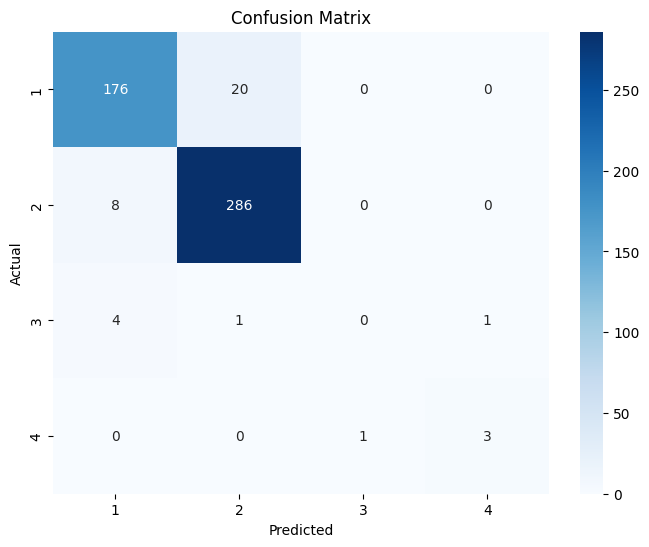

In [11]:
# 10. Menampilkan Confusion Matrix dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()